In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [15]:
#Load movie names and movie ratings
url='https://raw.githubusercontent.com/agolov/numericalmodels/master/Lecture3/'
movies = pd.read_csv(url+'movies.csv')
ratings = pd.read_csv(url+'ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)


In [21]:
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
M = M.replace(np.nan, 0, regex=True)
M = np.delete(M.values,np.s_[3000:],axis=1)
X_std = StandardScaler().fit_transform(M)
X_std.shape

(718, 3000)

In [23]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vect = np.linalg.eigh(cov_mat)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[ -2.89070165e-13  -2.43245107e-13  -1.86489761e-13 ...,   1.17183310e+02
   1.67643482e+02   3.73662928e+02]


In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

len(cum_var_exp[cum_var_exp<0.95])

338

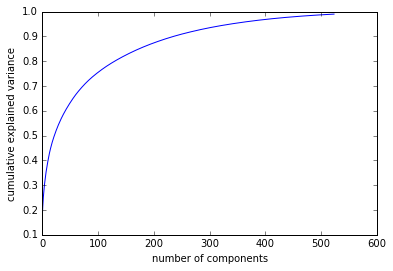

In [20]:
plt.plot(cum_var_exp[cum_var_exp<0.99])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()